# Computer Vision Basics with openCV

### Import statements

In [1]:
import cv2
import numpy as np

### Check your openCV version

In [ ]:
cv2.__version__

## Computer Vision Basics

### Load and Image

In [ ]:
# Declare a variable with the path to your image
path = 'surfer.jpg'

In [ ]:
# Load the image with openCV
img = cv2.imread(path)

[Hint](# "You will need to use cv2.imread")

### Check the image type

In [ ]:
# What is the image type? -> type
type(img)

[Hint](# "Just use the python type function")

In [ ]:
# Print the value of the pixels of the image
img

[Hint](# "Just use the python print function")

### Show the image using openCV

In [ ]:
# Lets now see the image! dont forget to call destroyAllWindows!
cv2.imshow("Display Window",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

[Hint](# "You need to use imshow, waitkey and destroyAllWindows")

### Now lets display unsing matplotlib

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Choose a pyplot figsize to make images fit nicely into the notebook
plt.figure(figsize=(20,20))

# Now display the image with plt
plt.imshow(img)

### Lets fix the colors

In [ ]:
# Does your image look ok? are the colors the right ones?, if not, lets fix it!
# Remember that openCV will load images using BGR rather than RGB
# Change the image to RGB and diplay it again with plt
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

[Hint](# "use cvtColor") 

### What is the shape of the image?

In [ ]:
# Check the image shape
rgb_img.shape

### Lets make it grayscale

In [ ]:
# Load the the image in grayscale, what are the 2 ways you can do that?
g_img = cv2.imread(path, 0)
g_img.shape

In [ ]:
# Now load an image in color and then transform it to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### What is the shape now?

In [ ]:
# Check the grayscale shape
gray_img.shape

### How does it look like?

In [ ]:
# Display the grayscale image with matplotlib, how does it look?
plt.imshow(gray_img)

### We need to indicate the colormap

In [ ]:
# Display the grayscale image with matplotlib, make sure to include the colormap so it really is grayscale
plt.imshow(gray_img, cmap='gray')

### Cropping an image

In [ ]:
# Lets now crop a Region of Interest of an image, load and image and crop different parts of it
crop = rgb_img[580:2020,1200:2600]
plt.imshow(crop)

In [ ]:
# Save to disk the cropped areas
cv2.imwrite('crop.png',crop)

### To edit an image making a copy of it is always a good idea!

In [ ]:
# Load an image and then make a copy of it
copy_img = rgb_img.copy()
plt.imshow(copy_img)

[Hint](# "use the numpy function ") 

## Annotating images

### Rectangles

In [ ]:
# Draw green rectangle on top of a region of interest in your image
cv2.rectangle(copy_img,(1450,800),(2570,2200),(0,255,0),10)
plt.imshow(copy_img)

[Hint](# "You will need to use the cv2 function rectangle(img, pt1, pt2, color, thickness) -> img") 

### Adding text to images

In [ ]:
# Make a copy of your image and then write some text on top of the image
c_img = copy_img.copy()
cv2.putText(c_img,"Surfer",(500,500),cv2.FONT_HERSHEY_DUPLEX,13,(255,0,0),13)
plt.imshow(c_img)

[Hint](# "You will need to use cv2 putText function -> putText(img, text, coordinates, fontFace, fontScale, color, thickness, lineType). For fonts check the enum cv2.FONT_HERSHEY_") 

Now that you know how to load annotate and save images lets start manually annotating some images

![](annotations.jpg)

In [93]:
# Load as many images as you like and start annotating objects in the image, 
# Before annotating the images make a copy of the image so we keep the original without changes
# Use the format proposed in the example above
stret = cv2.imread('street.jpg')
stret = cv2.cvtColor(stret, cv2.COLOR_BGR2RGB)
line  = cv2.imread('crowded-line-up.jpg')
line  = cv2.cvtColor(line,cv2.COLOR_BGR2RGB)
street_c = stret.copy()
line_c = line.copy()
#plt.figure(figsize=(20,20))
#plt.grid(which='both')
#plt.imshow(street_c)

In [94]:
# function to add the bounding boxes and label
def add_box(img, text,main_top_left, main_bottom_right, text_box_tl, text_box_br, text_cor, col):
    cv2.rectangle(img, main_top_left, main_bottom_right, col, 4) #main box 
    cv2.rectangle(img, text_box_tl, text_box_br, col, -1)# small box for text
    cv2.putText(img, text, text_cor, cv2.FONT_HERSHEY_PLAIN,2,(0,0,0),2) # text 
    

In [101]:
add_box(line_c,"Paddler",(15,950), (325,1020),(13,910), (155,950), (14,945), (255,0,0))
add_box(line_c,"Paddler",(555,900),(875,1000),(553,860),(705,900), (554,900),(255,0,0))
add_box(line_c,"Surfer" ,(915,650),(1125,880),(913,610),(1055,650),(914,645),(255,255,0))
add_box(line_c,"Back Off",(300,450),(750,650),(300,400),(500,440),(300,440),(0,255,0))

In [76]:

#line up plots 
cv2.rectangle(line_c, (15,950),(325,1020),(255,0,0),4)
cv2.rectangle(line_c,(13,910),(155,950), (255,0,0),-1)
cv2.putText(line_c,"Paddler", (14,945), cv2.FONT_HERSHEY_DUPLEX,1,(0,0,0),1)
cv2.rectangle(line_c, (555,900),(875,1000),(255,0,0),4)
cv2.rectangle(line_c,(553,860),(705,900), (255,0,0),-1)
cv2.putText(line_c,"Paddler", (554,900), cv2.FONT_HERSHEY_DUPLEX,1,(0,0,0),1)
cv2.rectangle(line_c, (915,650),(1125,880),(255,255,0),4)
cv2.rectangle(line_c,(913,610),(1055,650), (255,255,0),-1)
cv2.putText(line_c,"Surfer", (914,645), cv2.FONT_HERSHEY_DUPLEX,1,(0,0,0),1)
cv2.rectangle(line_c, (300,450),(750,650),(0,255,0),4)
cv2.rectangle(line_c,(300,400),(500,440), (0,255,0),-1)
cv2.putText(line_c,"Back Off", (300,440), cv2.FONT_HERSHEY_DUPLEX,1,(0,0,0),1)
print(".")

.


In [78]:
# Street 
cv2.rectangle(street_c, (900,440), (990,700), (0,255,0),4)
cv2.rectangle(street_c, (900,400),(1000,440),(0,255,0),-1)
cv2.putText(street_c,"cyclist", (900,438), cv2.FONT_HERSHEY_PLAIN,2,(0,0,0),2)
print(".")

.


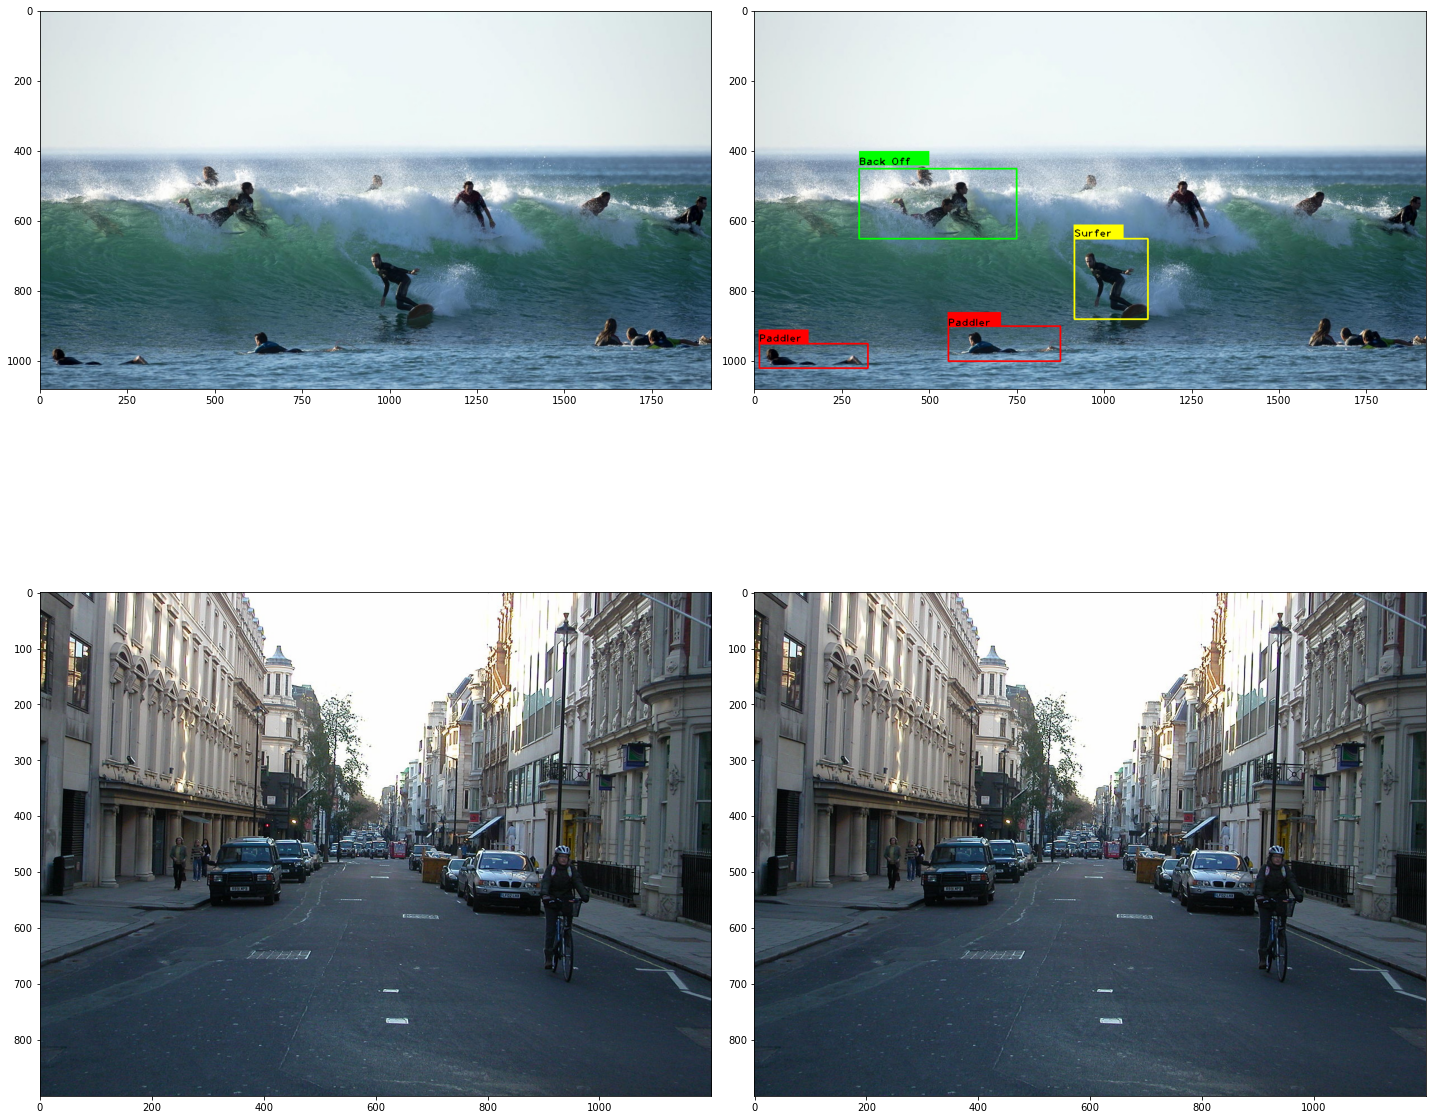

In [102]:
# Display the images that you have annotated above, both versions, the original one and the annotated one

f, axarr = plt.subplots(2,2, figsize=(20,20))
axarr[0,0].imshow(line)
axarr[0,1].imshow(line_c)
axarr[1,0].imshow(stret)
axarr[1,1].imshow(street_c)
f.tight_layout()

# Mini Projects

With all that you accomplished to do above you are now ready to do your first mini project!, you might need to learn some more new things to accomplish some of the harder levels below, it is very important to get used to the openCV docs 

## Meme creator

### Level 1
1. Create a basic Meme creator with one image and a short line of text, using any openCV font

### Level 2
1. Use the classic meme font (impact)

### Level 3
1. Improve it by adding 2 to 3 lines with the text on the top of the image and the bottom of the image
1. Make the text in white and with black contours

### Level 4
1. Make the text center automatically [Hint](# "getTextSize") 
1. If the text is too long it should wrap the text in as many lines as needed



In [2]:
#Add user input
import textwrap

In [3]:
meme_image_path = "jan.jpg"
meme_text = "When I leave school I'm going to the Canary Islands"

In [8]:
def make_meme(image,text):
    img = cv2.imread(image)
    cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    size = img.shape
    x, y = 10, int(size[0]/7)
    font = cv2.FONT_HERSHEY_PLAIN
    font_size = 2
    font_thickness = 4
    w = textwrap.wrap(text, width=15)
    for i, line in enumerate(w):
        textsize = cv2.getTextSize(line, font, font_size, font_thickness)[0]
        gap = textsize[1] + 10

        y = int((img.shape[0] + textsize[1]) / 2) + i * gap
        x = int((img.shape[1] - textsize[0]) / 2)

        cv2.putText(img, line, (x, y), font,
                    font_size, 
                    (255,0,255), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
    
    cv2.imwrite("jan_meme.png", img)
    #cv2.putText(img,text,(10,int(size[0]/7)),cv2.FONT_HERSHEY_PLAIN,2,(125,255,0),4)
    plt.figure(figsize=(15,15))
    plt.imshow(img)

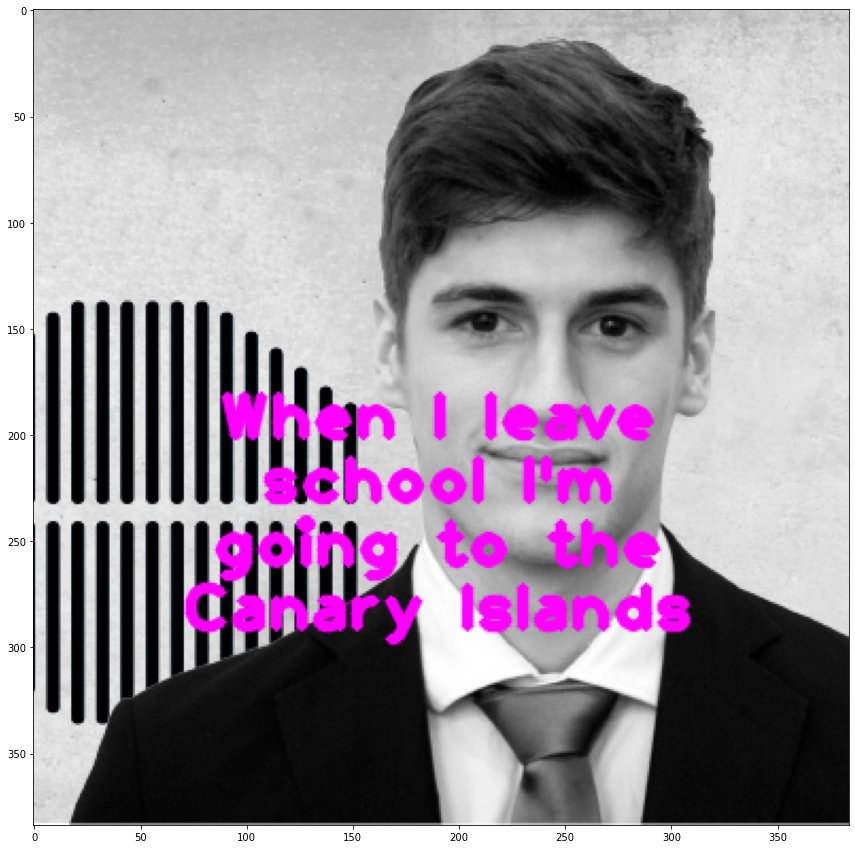

In [9]:
make_meme(meme_image_path, meme_text)

## QR Reader

### Level 1
1. Researn on the openCV docs and learn about QRCodeDetector
1. Grab any QR code from google images for example this one: ![](https://blog-trycontechnologi.netdna-ssl.com/blog/qrbatch/wp-content/uploads/sites/7/2019/07/ID-Card-with-QR-Code-2-1.png) or any other. 
1. Detect the code using QRCodeDetector
1. Print QR detected if a QR has been detected in the image

### Level 2
1. Decode and print the decoded text
1. Draw a rectangle around the QR code that has been detected and show it on screen
1. Save the QR region of the image to disk
